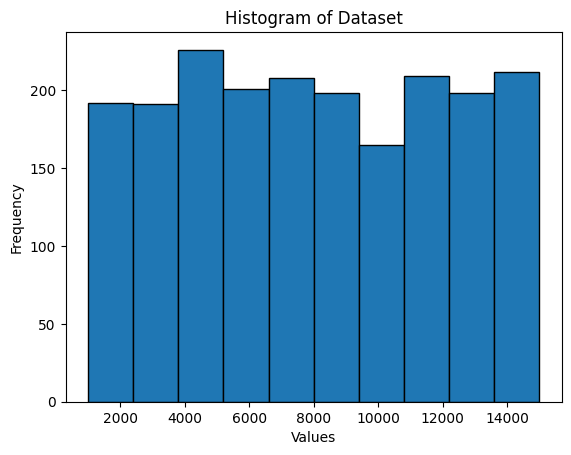

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/dataset.csv')
# data = pd.read_csv('../data/splitDataset.csv')

# Flatten all values into 1D before plotting
plt.hist(data.values.flatten(), bins=len(data.columns), edgecolor='black')

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Dataset")
plt.show()


In [10]:
values_list = data.values.flatten().tolist()
print(values_list)

[5895, 14720, 9973, 1621, 12926, 2202, 4923, 1562, 2739, 4556, 1743, 13631, 2866, 6670, 12406, 2484, 5251, 1945, 8822, 5710, 14824, 6464, 12418, 7233, 7641, 11455, 10163, 6603, 4391, 14529, 12456, 1272, 11415, 11537, 3388, 2643, 8243, 10365, 6947, 7214, 10952, 11577, 11398, 12318, 12821, 8918, 8507, 9502, 14798, 8360, 4939, 14383, 3466, 8198, 8209, 5985, 4845, 12335, 12952, 7889, 13273, 14508, 12135, 13132, 3185, 14924, 10177, 8711, 3421, 12013, 5987, 14740, 2659, 9601, 9206, 7795, 6495, 4755, 10875, 3594, 4835, 1203, 8857, 6827, 10583, 2676, 5824, 12953, 9047, 2795, 5961, 13173, 5017, 4392, 2924, 9601, 2752, 13055, 12181, 9319, 9916, 10712, 12516, 7356, 1156, 6357, 9200, 12879, 10937, 5517, 6973, 2286, 10600, 13041, 6011, 3980, 4786, 8988, 12362, 6849, 11187, 9397, 9767, 6733, 1607, 8005, 10929, 7716, 10935, 5387, 13201, 2423, 14239, 6110, 3097, 10196, 8336, 1503, 2817, 13949, 14734, 4956, 3124, 12685, 1137, 14694, 5383, 2646, 1615, 7511, 5861, 7320, 4611, 7546, 5811, 11105, 4555, 999

In [11]:
import numpy as np

bins = 10
values_array = np.array(values_list)
range_data = values_array.max() - values_array.min()
bin_width = range_data / bins

data = {}
for i in range(bins):
    start = values_array.min() + i * bin_width
    end   = start + bin_width
    value_list_data = values_array[(values_array>=start) & (values_array<=end) ]
    data[f'bin_{i+1}'] = pd.Series(np.unique(np.sort(value_list_data)))


# for i in range(bins):
#     start = values_array.min() + i * bin_width
#     end   = start + bin_width
#     value_list_data = np.sort(values_array[(values_array>=start) & (values_array<=end) ])
#     data[f'bin_{i+1}'] = pd.Series(value_list_data)


new_df = pd.DataFrame(data)
new_df


,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,bin_10
0,1009.0,2411.0,3806,5208.0,6603.0,8000.0,9397.0,10799.0,12198.0,13602.0
1,1010.0,2417.0,3814,5209.0,6609.0,8002.0,9398.0,10821.0,12218.0,13626.0
2,1012.0,2423.0,3832,5212.0,6619.0,8005.0,9409.0,10825.0,12227.0,13631.0
3,1017.0,2426.0,3833,5213.0,6621.0,8010.0,9412.0,10838.0,12230.0,13637.0
4,1023.0,2435.0,3835,5225.0,6626.0,8038.0,9413.0,10849.0,12231.0,13643.0
...,...,...,...,...,...,...,...,...,...,...
205,NaN,NaN,5178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,5190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,5197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,5199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt


In [13]:
data = pd.read_csv('../data/file.csv')
data = data.loc[:,['Tenure_Months','Avg_Price']]
plt.hist(data.loc[:,'Tenure_Months'], bins=10, edgecolor='black')
with PdfPages("maingraph.pdf") as pdf:
    plt.xlabel("Tenure_Months")
    plt.ylabel("Frequency")
    plt.title("Histogram of Dataset")
    pdf.savefig()
    plt.close() 

In [14]:
max_value = data.iloc[:,0].max()
min_value = data.iloc[:,0].min()

In [20]:

start = min_value
binrange = round((max_value - min_value) / bins, 2)


with PdfPages("subgraphs.pdf") as pdf:
    for i in range(bins):
        offset = round(start + binrange, 2)
        
        new_data = data[(data.iloc[:,0] >= start) & (data.iloc[:,0] <= offset)]
        
        plt.hist(new_data.iloc[:,1], bins=10, edgecolor='black')
        plt.title(f"Histogram of Bin {i+1}")
        plt.xlabel(f'avg_price of bin-{i+1} (range {start}-{offset})')
        plt.ylabel('frequency')
        
        pdf.savefig()
        plt.close()  
        
        start = round(start + binrange, 2)
